## Conf vs Acc and Permutation Importance

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

In [3]:
LEADS = np.arange(5,31)
AVGS = np.arange(2,29)
SEEDS = np.arange(1,6)
ddir_load = '/glade/derecho/scratch/kjmayer/DATA/ENSOvsMJO/data/doy_interpret/'

### Load Data

In [5]:
# Orginial Confidence vs Accuracy
confvsacc_all = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS),100))
confvsacc_all_obs = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS),100))

for l,lead in enumerate(LEADS):
    print('LEAD: '+str(lead))
    for a,avg in enumerate(AVGS):
        finame_confvsacc = 'confvsacc_DOY_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        finame_confvsacc_obs = 'confvsacc_obs_DOY_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        confvsacc_all[l,a] = np.load(ddir_load+finame_confvsacc)
        confvsacc_all_obs[l,a] = np.load(ddir_load+finame_confvsacc_obs)

confvsacc_all = np.mean(confvsacc_all,axis=2)
confvsacc_all_obs = np.mean(confvsacc_all_obs,axis=2)

LEAD: 5
LEAD: 6
LEAD: 7
LEAD: 8
LEAD: 9
LEAD: 10
LEAD: 11
LEAD: 12
LEAD: 13
LEAD: 14
LEAD: 15
LEAD: 16
LEAD: 17
LEAD: 18
LEAD: 19
LEAD: 20
LEAD: 21
LEAD: 22
LEAD: 23
LEAD: 24
LEAD: 25
LEAD: 26
LEAD: 27
LEAD: 28
LEAD: 29
LEAD: 30


In [6]:
# Permutation Importance Results
confvsacc_mjo_pi = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS),100))
confvsacc_enso_pi = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS),100))
confvsacc_mjoenso_pi = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS),100))

for l,lead in enumerate(LEADS):
    print('LEAD: '+str(lead))
    for a,avg in enumerate(AVGS):
        finame_mjoconfvsacc = 'confvsacc_permutimport-MJO_DOY_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        finame_ensoconfvsacc = 'confvsacc_permutimport-ENSO_DOY_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        # finame_mjoensoconfvsacc = 'confvsacc_permutimport-MJOENSO_DOY_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        
        confvsacc_mjo_pi[l,a] = np.load(ddir_load+finame_mjoconfvsacc)
        confvsacc_enso_pi[l,a] = np.load(ddir_load+finame_ensoconfvsacc)
        # confvsacc_mjoenso_pi[l,a] = np.load(ddir_load+finame_mjoensoconfvsacc)
        
        
confvsacc_mjo_pi = np.mean(confvsacc_mjo_pi,axis=2)
confvsacc_enso_pi = np.mean(confvsacc_enso_pi,axis=2)
# confvsacc_mjoenso_pi = np.mean(confvsacc_mjoenso_pi,axis=2)

LEAD: 5
LEAD: 6
LEAD: 7
LEAD: 8
LEAD: 9
LEAD: 10
LEAD: 11
LEAD: 12
LEAD: 13
LEAD: 14
LEAD: 15
LEAD: 16
LEAD: 17
LEAD: 18
LEAD: 19
LEAD: 20
LEAD: 21
LEAD: 22
LEAD: 23
LEAD: 24
LEAD: 25
LEAD: 26
LEAD: 27
LEAD: 28
LEAD: 29
LEAD: 30


In [7]:
## Difference:
confvsacc_mjo_diff = confvsacc_mjo_pi - confvsacc_all
confvsacc_enso_diff = confvsacc_enso_pi - confvsacc_all
# confvsacc_mjoenso_diff = confvsacc_mjoenso_pi - confvsacc_all

### Plot Data

### Plot Difference (Permutation - Original)

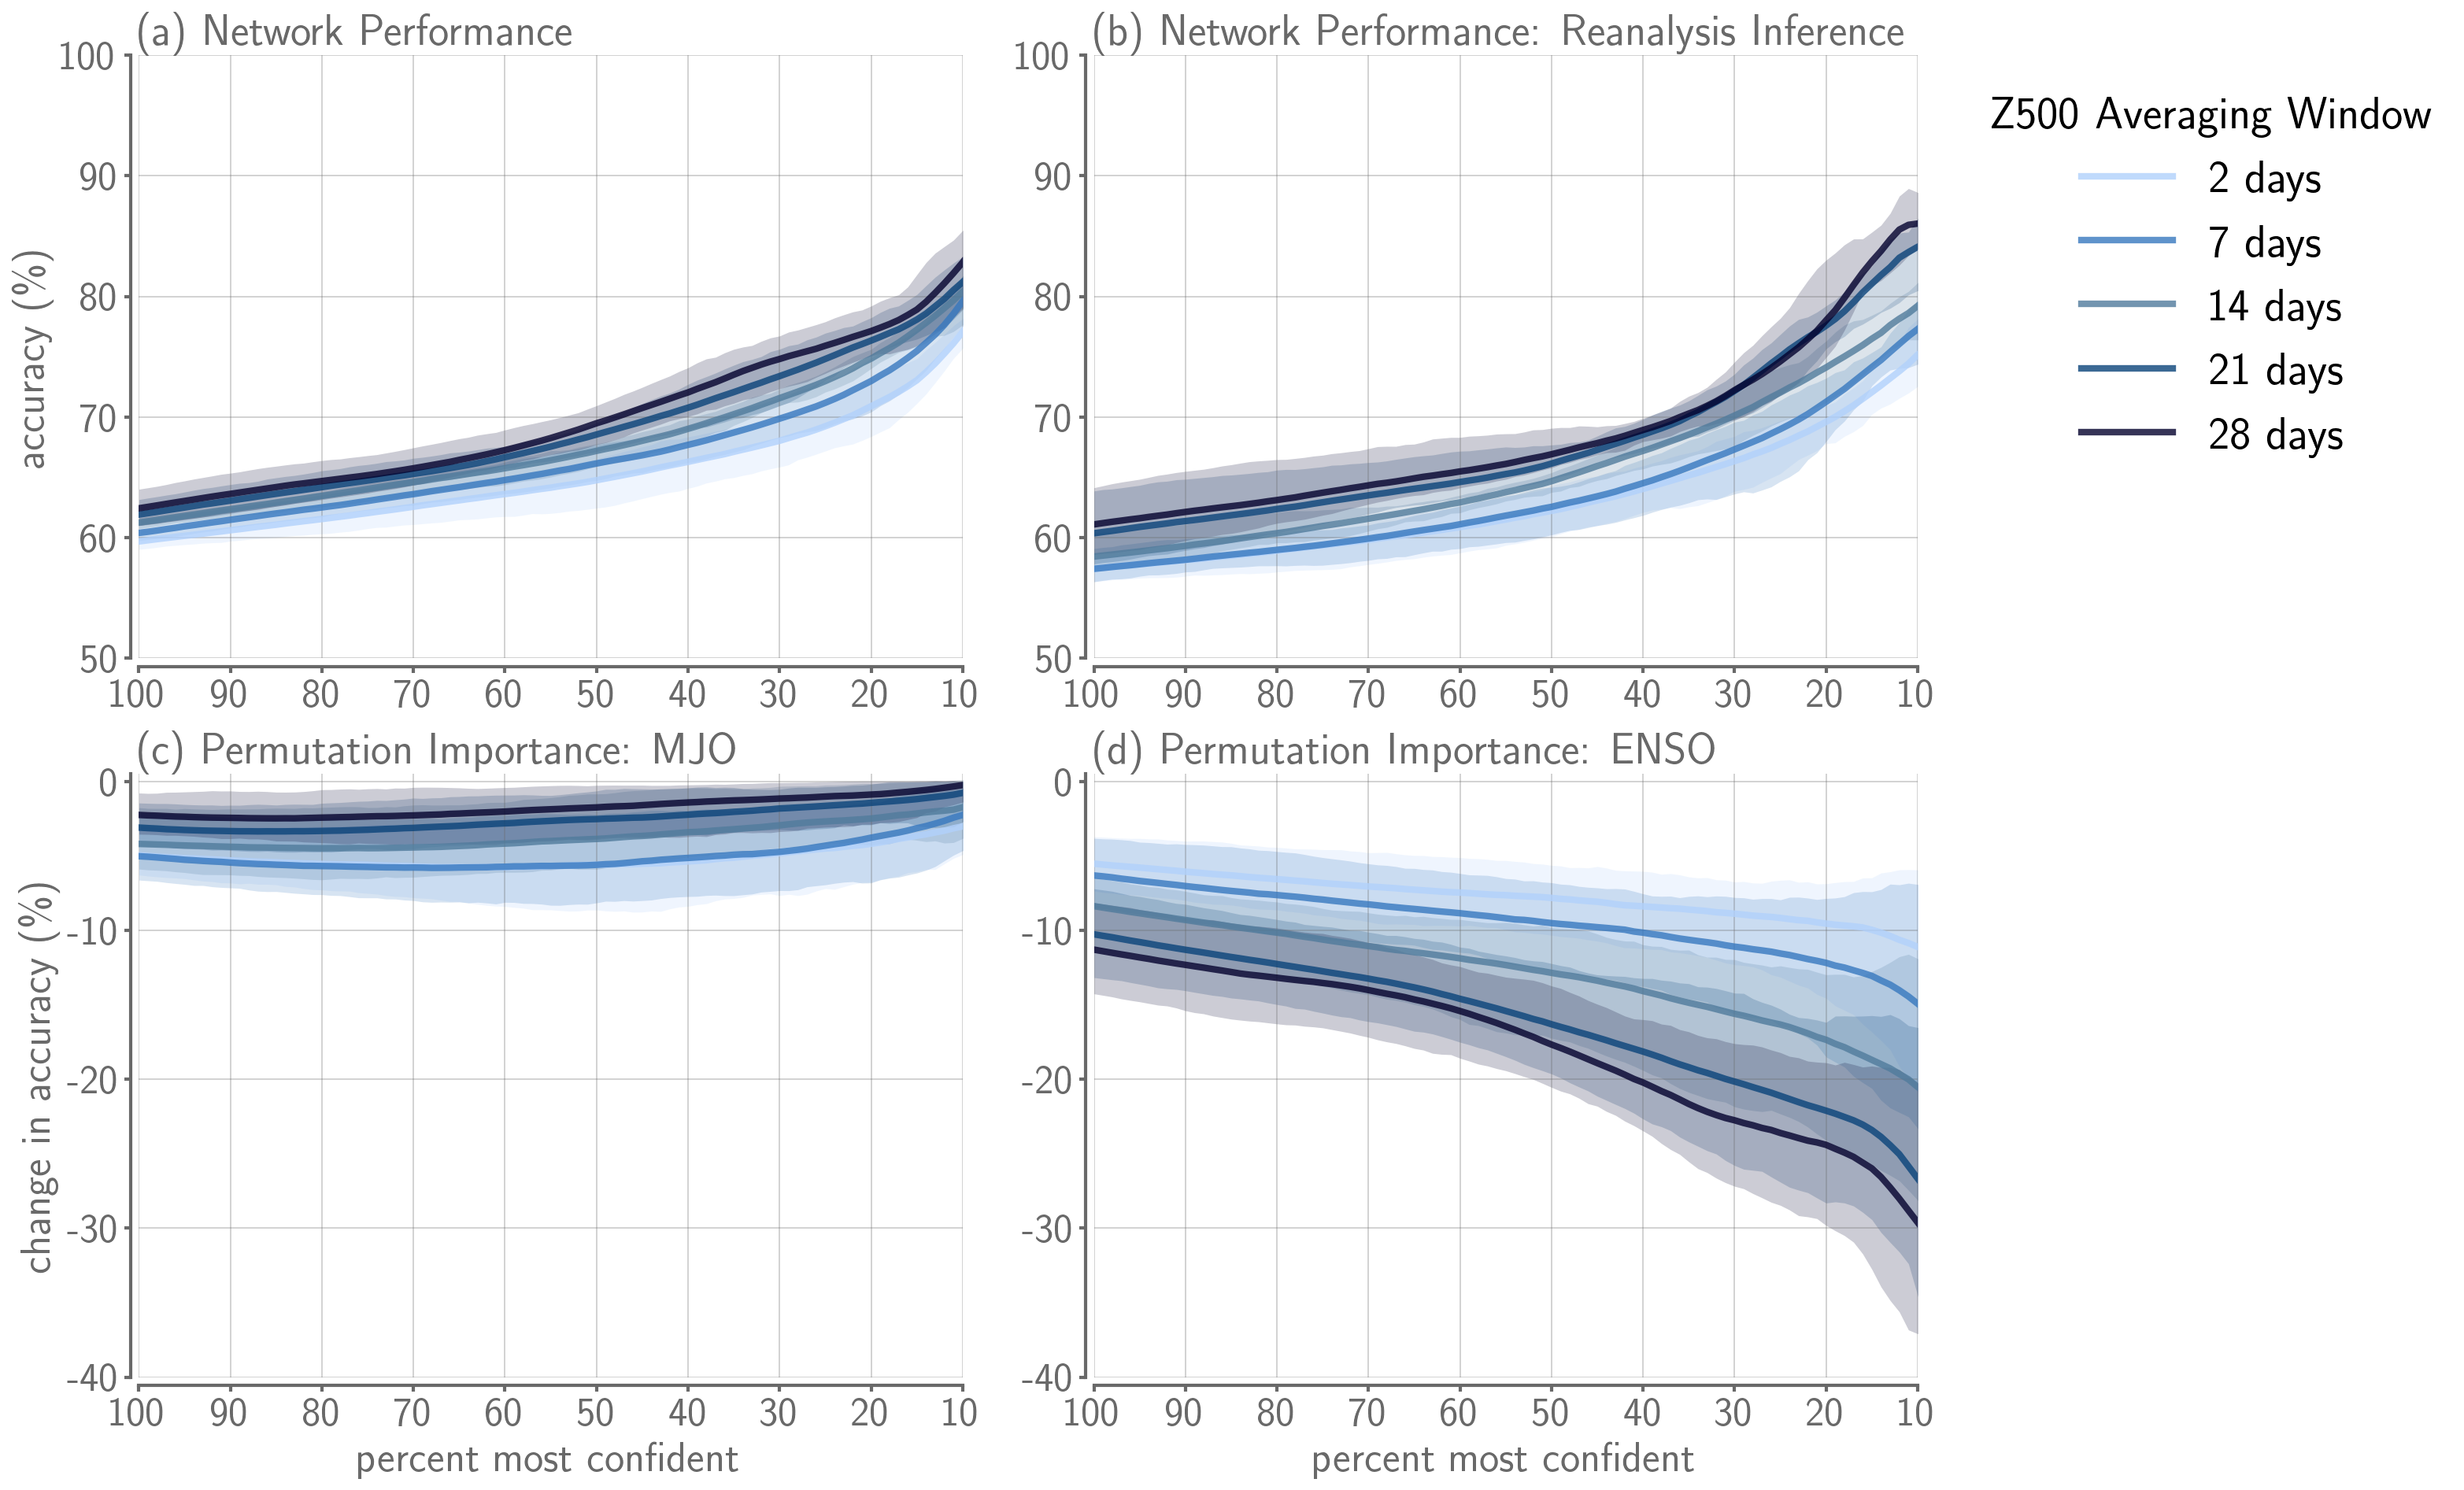

In [10]:
linewidth = 4
FS = 25

fig = plt.figure(figsize=(16,12))
ax = fig.subplot_mosaic('''
                        AB
                        CD
                        ''')
plt.tight_layout(w_pad=3,h_pad=3)
for loc in ['A','B','C','D']:   
    adjust_spines(ax[loc], ['left', 'bottom'])
    ax[loc].spines['top'].set_color('none')
    ax[loc].spines['right'].set_color('none')
    ax[loc].spines['left'].set_color('dimgrey')
    ax[loc].spines['bottom'].set_color('dimgrey')
    ax[loc].spines['left'].set_linewidth(2)
    ax[loc].spines['bottom'].set_linewidth(2)
    ax[loc].tick_params('both',length=4,width=2,which='major',color='dimgrey')
    ax[loc].yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    ax[loc].xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    
    ax[loc].set_xlim(0,90)
    ax[loc].set_xticks(np.arange(0,100,10),np.arange(10,110,10)[::-1],fontsize=FS,color='dimgrey')

    if loc in ['A','B']:
        ax[loc].set_ylim(50,100)
        ax[loc].set_yticks(np.arange(50,110,10),np.arange(50,110,10),fontsize=FS,color='dimgrey')
    if loc == 'A':
        ax[loc].set_ylabel('accuracy (\%)',fontsize=FS+1,color='dimgrey')
    
    if loc == 'C':
        ax[loc].set_ylabel('change in accuracy (\%)',fontsize=FS+1,color='dimgrey')  
    if loc in ['C','D']:
        ax[loc].set_ylim(-40,0.5)
        ax[loc].set_yticks(np.arange(-40,10,10),np.arange(-40,10,10),fontsize=FS,color='dimgrey')
        ax[loc].set_xlabel('percent most confident',fontsize=FS+1,color='dimgrey')

        
        
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
ax['A'].set_title('(a) Network Performance',fontsize=FS+2,color='dimgrey',loc='left')
ax['A'].plot(np.mean(confvsacc_all[:,0],axis=0),'xkcd:powder blue',alpha=0.8,label='2 days',linewidth=linewidth)
ax['A'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all[:,0],axis=0),
                 y2 = np.max(confvsacc_all[:,0],axis=0),color='xkcd:powder blue',alpha=0.2,linewidth=0)

ax['A'].plot(np.mean(confvsacc_all[:,5],axis=0),'xkcd:windows blue',alpha=0.8,label='7 days',linewidth=linewidth)
ax['A'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all[:,5],axis=0),
                 y2 = np.max(confvsacc_all[:,5],axis=0),color='xkcd:windows blue',alpha=0.2,linewidth=0)

ax['A'].plot(np.mean(confvsacc_all[:,12],axis=0),'xkcd:stormy blue',alpha=0.8,label='14 days',linewidth=linewidth)
ax['A'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all[:,12],axis=0),
                 y2 = np.max(confvsacc_all[:,12],axis=0),color='xkcd:stormy blue',alpha=0.2,linewidth=0)

ax['A'].plot(np.mean(confvsacc_all[:,19],axis=0),'xkcd:twilight blue',alpha=0.8,label='21 days',linewidth=linewidth)
ax['A'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all[:,19],axis=0),
                 y2 = np.max(confvsacc_all[:,19],axis=0),color='xkcd:twilight blue',alpha=0.2,linewidth=0)

ax['A'].plot(np.mean(confvsacc_all[:,26],axis=0),'xkcd:midnight',alpha=0.8,label='28 days',linewidth=linewidth)
ax['A'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all[:,26],axis=0),
                 y2 = np.max(confvsacc_all[:,26],axis=0),color='xkcd:midnight',alpha=0.2,linewidth=0)        
        
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

ax['B'].set_title('(b) Network Performance: Reanalysis Inference',fontsize=FS+2,color='dimgrey',loc='left')
ax['B'].plot(np.mean(confvsacc_all_obs[:,0],axis=0),'xkcd:powder blue',alpha=0.8,label='2 days',linewidth=linewidth)
ax['B'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all_obs[:,0],axis=0),
                 y2 = np.max(confvsacc_all_obs[:,0],axis=0),color='xkcd:powder blue',alpha=0.2,linewidth=0)

ax['B'].plot(np.mean(confvsacc_all_obs[:,5],axis=0),'xkcd:windows blue',alpha=0.8,label='7 days',linewidth=linewidth)
ax['B'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all_obs[:,5],axis=0),
                 y2 = np.max(confvsacc_all_obs[:,5],axis=0),color='xkcd:windows blue',alpha=0.2,linewidth=0)

ax['B'].plot(np.mean(confvsacc_all_obs[:,12],axis=0),'xkcd:stormy blue',alpha=0.8,label='14 days',linewidth=linewidth)
ax['B'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all_obs[:,12],axis=0),
                 y2 = np.max(confvsacc_all_obs[:,12],axis=0),color='xkcd:stormy blue',alpha=0.2,linewidth=0)

ax['B'].plot(np.mean(confvsacc_all_obs[:,19],axis=0),'xkcd:twilight blue',alpha=0.8,label='21 days',linewidth=linewidth)
ax['B'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all_obs[:,19],axis=0),
                 y2 = np.max(confvsacc_all_obs[:,19],axis=0),color='xkcd:twilight blue',alpha=0.2,linewidth=0)

ax['B'].plot(np.mean(confvsacc_all_obs[:,26],axis=0),'xkcd:midnight',alpha=0.8,label='28 days',linewidth=linewidth)
ax['B'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_all_obs[:,26],axis=0),
                 y2 = np.max(confvsacc_all_obs[:,26],axis=0),color='xkcd:midnight',alpha=0.2,linewidth=0) 


leg = ax['B'].legend(frameon=False, fontsize=FS+3,ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left")
leg.set_title('Z500 Averaging Window',prop={'size':FS+3})

# # ------------------------------------------------------------------------------------
# # ------------------------------------------------------------------------------------
# # ------------------------------------------------------------------------------------

ax['C'].set_title('(c) Permutation Importance: MJO',fontsize=FS+2,color='dimgrey',loc='left')
ax['C'].plot(np.mean(confvsacc_mjo_diff[:,0],axis=0),'xkcd:powder blue',alpha=0.8,label='2 days',linewidth=linewidth)
ax['C'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_mjo_diff[:,0],axis=0),
                 y2 = np.max(confvsacc_mjo_diff[:,0],axis=0),color='xkcd:powder blue',alpha=0.2,linewidth=0)

ax['C'].plot(np.mean(confvsacc_mjo_diff[:,5],axis=0),'xkcd:windows blue',alpha=0.8,label='7 days',linewidth=linewidth)
ax['C'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_mjo_diff[:,5],axis=0),
                 y2 = np.max(confvsacc_mjo_diff[:,5],axis=0),color='xkcd:windows blue',alpha=0.2,linewidth=0)

ax['C'].plot(np.mean(confvsacc_mjo_diff[:,12],axis=0),'xkcd:stormy blue',alpha=0.8,label='14 days',linewidth=linewidth)
ax['C'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_mjo_diff[:,12],axis=0),
                 y2 = np.max(confvsacc_mjo_diff[:,12],axis=0),color='xkcd:stormy blue',alpha=0.2,linewidth=0)

ax['C'].plot(np.mean(confvsacc_mjo_diff[:,19],axis=0),'xkcd:twilight blue',alpha=0.8,label='21 days',linewidth=linewidth)
ax['C'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_mjo_diff[:,19],axis=0),
                 y2 = np.max(confvsacc_mjo_diff[:,19],axis=0),color='xkcd:twilight blue',alpha=0.2,linewidth=0)

ax['C'].plot(np.mean(confvsacc_mjo_diff[:,26],axis=0),'xkcd:midnight',alpha=0.8,label='28 days',linewidth=linewidth)
ax['C'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_mjo_diff[:,26],axis=0),
                 y2 = np.max(confvsacc_mjo_diff[:,26],axis=0),color='xkcd:midnight',alpha=0.2,linewidth=0)


# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

ax['D'].set_title('(d) Permutation Importance: ENSO',fontsize=FS+2,color='dimgrey',loc='left')
ax['D'].plot(np.mean(confvsacc_enso_diff[:,0],axis=0),'xkcd:powder blue',alpha=0.8,label='2 days',linewidth=linewidth)
ax['D'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_enso_diff[:,0],axis=0),
                 y2 = np.max(confvsacc_enso_diff[:,0],axis=0),color='xkcd:powder blue',alpha=0.2,linewidth=0)

ax['D'].plot(np.mean(confvsacc_enso_diff[:,5],axis=0),'xkcd:windows blue',alpha=0.8,label='7 days',linewidth=linewidth)
ax['D'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_enso_diff[:,5],axis=0),
                 y2 = np.max(confvsacc_enso_diff[:,5],axis=0),color='xkcd:windows blue',alpha=0.2,linewidth=0)

ax['D'].plot(np.mean(confvsacc_enso_diff[:,12],axis=0),'xkcd:stormy blue',alpha=0.8,label='14 days',linewidth=linewidth)
ax['D'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_enso_diff[:,12],axis=0),
                 y2 = np.max(confvsacc_enso_diff[:,12],axis=0),color='xkcd:stormy blue',alpha=0.2,linewidth=0)

ax['D'].plot(np.mean(confvsacc_enso_diff[:,19],axis=0),'xkcd:twilight blue',alpha=0.8,label='21 days',linewidth=linewidth)
ax['D'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_enso_diff[:,19],axis=0),
                 y2 = np.max(confvsacc_enso_diff[:,19],axis=0),color='xkcd:twilight blue',alpha=0.2,linewidth=0)

ax['D'].plot(np.mean(confvsacc_enso_diff[:,26],axis=0),'xkcd:midnight',alpha=0.8,label='28 days',linewidth=linewidth)
ax['D'].fill_between(x = np.arange(0,100),
                 y1 = np.min(confvsacc_enso_diff[:,26],axis=0),
                 y2 = np.max(confvsacc_enso_diff[:,26],axis=0),color='xkcd:midnight',alpha=0.2,linewidth=0)

plt.savefig('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/plots/confvsacc_permutimport_doy_main.png',dpi=300,bbox_inches='tight')
# plt.show()

In [ ]:
# ax['B'].set_title('(b) Permutation Importance: MJO \& ENSO',fontsize=FS+5,color='dimgrey',loc='left')
# ax['B'].plot(np.mean(confvsacc_mjoenso_diff[:,0],axis=0),'xkcd:powder blue',alpha=0.8,label='2 days',linewidth=linewidth)
# ax['B'].fill_between(x = np.arange(0,100),
#                  y1 = np.min(confvsacc_mjoenso_diff[:,0],axis=0),
#                  y2 = np.max(confvsacc_mjoenso_diff[:,0],axis=0),color='xkcd:powder blue',alpha=0.2,linewidth=0)

# ax['B'].plot(np.mean(confvsacc_mjoenso_diff[:,5],axis=0),'xkcd:windows blue',alpha=0.8,label='7 days',linewidth=linewidth)
# ax['B'].fill_between(x = np.arange(0,100),
#                  y1 = np.min(confvsacc_mjoenso_diff[:,5],axis=0),
#                  y2 = np.max(confvsacc_mjoenso_diff[:,5],axis=0),color='xkcd:windows blue',alpha=0.2,linewidth=0)

# ax['B'].plot(np.mean(confvsacc_mjoenso_diff[:,12],axis=0),'xkcd:stormy blue',alpha=0.8,label='14 days',linewidth=linewidth)
# ax['B'].fill_between(x = np.arange(0,100),
#                  y1 = np.min(confvsacc_mjoenso_diff[:,12],axis=0),
#                  y2 = np.max(confvsacc_mjoenso_diff[:,12],axis=0),color='xkcd:stormy blue',alpha=0.2,linewidth=0)

# ax['B'].plot(np.mean(confvsacc_mjoenso_diff[:,19],axis=0),'xkcd:twilight blue',alpha=0.8,label='21 days',linewidth=linewidth)
# ax['B'].fill_between(x = np.arange(0,100),
#                  y1 = np.min(confvsacc_mjoenso_diff[:,19],axis=0),
#                  y2 = np.max(confvsacc_mjoenso_diff[:,19],axis=0),color='xkcd:twilight blue',alpha=0.2,linewidth=0)

# ax['B'].plot(np.mean(confvsacc_mjoenso_diff[:,26],axis=0),'xkcd:midnight',alpha=0.8,label='28 days',linewidth=linewidth)
# ax['B'].fill_between(x = np.arange(0,100),
#                  y1 = np.min(confvsacc_mjoenso_diff[:,26],axis=0),
#                  y2 = np.max(confvsacc_mjoenso_diff[:,26],axis=0),color='xkcd:midnight',alpha=0.2,linewidth=0)

